Tweet data is stored in JSON format by Twitter. Getting tweet JSON data via tweet ID using Tweepy is described well in this StackOverflow answer. Note that setting the tweet_mode parameter to 'extended' in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.

Also, note that the tweets corresponding to a few tweet IDs in the archive may have been deleted. Try-except blocks may come in handy here.

# Introduction and import of modules

This project aims to use the tweet archive of twitter user `@dog_rates` also known as `WeRateDogs` . The project focusses on collecting, assessing and cleaning the data collected through the Twitter API using `tweepy`. After Wrangling an analysis is made of the data. The initial estimate of necessary modules is as follows:
* pandas
* numpy
* matplotlib
* re
* statsmodels

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
%matplotlib inline

In [91]:
import tweepy

consumer_key = 'aNTJRrnNf2PI9JXP7AvpkTB4M'
consumer_secret = 'bPu9Rcwuyn3ps8JNN6UqzEZYfmWo7RbboC8YcNaCLQ3NicD0Ci'
access_token = '92779782-ry7yZqmQq6PvQN9p1dF2pYDo9BBDInMybnwBidmlT'
access_secret = 'Rt5d2aEbsq1NXwDwFKnVBogSgmrRnZew4RnQKcFqNfXjm'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Description of data sources and import of data

Import of data:

WeRateDogs Twitter archive is available as a csv file, provided by Udacity. the filename is `twitter_archive_enhanced.csv`

The neural network generated file with predictions of dog breeds based on the images in the twitter archive is available from the following website https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Use the tweet ID's in the archive, to query the twitter API for additional data, write the additional data to `tweet_json.txt`. Gather at minimum
* tweet id
* Retweet count
* favorite count
Write each tweets json data to a new line in the `tweet_json.txt` file. use:https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

In [92]:
#load csv file
twitter_archive = pd.read_csv("twitter-archive-enhanced-2.csv")
#check if it worked
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [93]:
#copied a tweet_id from the csv file for testing purposes with tweepy
test_id = '892420643555336193'
testtweet = api.get_status(test_id)
testtweet.retweet_count, testtweet.favorite_count

(7420, 35161)


**possible command in tweepy API:** 
        created_at : The time the status was posted.
        id : The ID of the status.
        id_str : The ID of the status as a string.
        text : The text of the status.
        entities : The parsed entities of the status such as hashtags, URLs etc.
        source : The source of the status.
        source_url : The URL of the source of the status.
        in_reply_to_status_id : The ID of the status being replied to.
        in_reply_to_status_id_str : The ID of the status being replied to in as a string.
        in_reply_to_user_id : The ID of the user being replied to.
        in_reply_to_user_id_str : The ID of the user being replied to as a string.
        in_reply_to_screen_name : The screen name of the user being replied to
        user : The User object of the poster of the status.
        geo : The geo object of the status.
        coordinates : The coordinates of the status.
        place : The place of the status.
        contributors : The contributors of the status.
        is_quote_status : Indicates whether the status is a quoted status or not.
        retweet_count : The number of retweets of the status.
        favorite_count : The number of likes of the status.
        favorited : Indicates whether the status has been favourited by the authenticated user or not.
        retweeted : Indicates whether the status has been retweeted by the authenticated user or not.
        possibly_sensitive : Indicates whether the status is sensitive or not.
        lang : The language of the status.



In [94]:
#load additional modules
import requests
import os
# download the image pridections file
# commented out for repeat running of code
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)
#check if response worked
#response

In [95]:
#download dog breed predictions file and store in base directory
#with open('predictions.tsv',mode = 'wb') as file:
    #file.write(response.content)

In [96]:
#check if file is downloaded
#os.listdir()

In [97]:
# open file

predictions = pd.read_csv('predictions.tsv', delimiter = '\t' )
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Create `tweet_json.txt` 

In [98]:
# import json module
import json
from timeit import default_timer as timer

In [99]:
# Entire loop is commented out as the txt file is already created
#count = 0
#fails_dict = {}
#start = timer()
#tweet_ids = predictions.tweet_id.values

#with open ('tweet_json3.txt', 'w', encoding = "utf-8") as outfile:
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode= 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
#            print("succes")
#            json.dump(tweet._json, outfile)
#            outfile.write("\n")
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()

In [100]:
tweets = []
with open( 'tweet_json3.txt', 'r', encoding = "utf-8") as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweets.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
api_twitter_counts = pd.DataFrame(data= tweets)

In [101]:
api_twitter_counts.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,445,2338
1,666029285002620928,41,118
2,666033412701032449,39,107
3,666044226329800704,122,262
4,666049248165822465,38,94


In [102]:
api_twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2058 non-null   int64
 1   retweet_count   2058 non-null   int64
 2   favorite_count  2058 non-null   int64
dtypes: int64(3)
memory usage: 48.4 KB




# Data Wrangling

Key points for data wrangling in the assignment
Key Points

Key points to keep in mind when data wrangling for this project:

 * You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
 * Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
 * Cleaning includes merging individual pieces of data according to the rules of tidy data. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
 * You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


##  Assesment

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues 

In [103]:
#making a copy for cleaning purposes
twitter_archive_clean= twitter_archive.copy()

Find initial issues using info command

In [104]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

1. Non null counts
    It appears most NaN values appear in columns that contain ID's. from reply's or retweets. It could be that only these tweets are reply's or retweets. However in light of potential analyses, it seems the most important columns all have a complete set of non null counts (2356)
2. Data types
    The tweet ID's that are either reply or retweeted ID's are float objects. This could be problematic, and they should be changed to int or string formats, depending on future operations.       `tweet_id` being int64 is good, and the rest are in string format. So this is not problematic. `timestamp` should be in datetime format

Next steps:

most important column is `tweet_id`. so first of all
1. check if `tweet_id` are all tweet id's 
2. check all columns except other ID's for issues
3. check other id columns in the same manner as `tweet_id`
4. check other data soures i.e `predictions`

Below we check all entries in the `tweet_id` column, by converting them to strings and filtering through regex all rows that are NOT a string of digits.

In [105]:
#check tweet_id to see if all columns contain a sequence of digits or not
twitter_archive_clean[~twitter_archive_clean['tweet_id'].astype(str).str.contains(r'\d{18}')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


This shows all rows in `tweet_id`are a series of digits of length 18, and therefore probably tweet_id's

A similar check can be done on the `timestamp`. Since `timestamp` since timestamp is already in string format, we don't need to convert. All tweets appear to have the same timestamp format, meaning `timestamp`has no issues.

In [106]:
twitter_archive_clean[~twitter_archive_clean['timestamp'].str.contains(r'[0-9]{4}-0[1-9]|1[0-2]-0[1-9]|[1-2][0-9]|3[0-1] 2[0-3]|[01][0-9]:[0-5][0-9]')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [107]:
twitter_archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Checking `source`for unique values, shows only four unique values. No analysis of this column is planned. A good outcome from this check is that the column contains no other data besides source data. 

checking the text column requires further steps.

In [108]:
twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [109]:
twitter_archive_clean.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

Checking the `rating_numerator`...here we expect a number, so we need to check the column for non digit content

In [110]:
twitter_archive_clean[~twitter_archive_clean['rating_numerator'].astype(str).str.contains(r'\d')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


secondly it is good to see if there are any non digit values in the `rating_denominator`

In [111]:
twitter_archive_clean[~twitter_archive_clean['rating_denominator'].astype(str).str.contains(r'\d')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Viewing the source file shows us that there are no further problems with the columns of `rating_numerator` and `rating_denominator`. 
The dog name column should contain only one word, preferably the name, so let's check this first

In [112]:
twitter_archive_clean[~twitter_archive_clean['name'].str.contains(r'^\w+$')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Here we see all content of the `name`column is a single word. However we see in the `.info()` field that in the `doggo`column the word `None` is filed, and this column has no NaN values listed. Perhaps this is also the case for the `name` column. So let's check for the word `None`. 

In [113]:
#checking for the string "None" in the "name" column
twitter_archive_clean[twitter_archive_clean['name'].str.contains(r'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


Here the fist issue is identified. This is a quality issue, since data is missing. This issue is documented under data Quality below. As we can see above, in the adjacent columns, the word "None" appears multiple times. So let's document these issues as well.

In [114]:
#counting occurences of the words "doggo", "floofer", "pupper" and "puppo" in the corresponding columns
twitter_archive_clean.doggo.str.count('None').sum(),twitter_archive_clean.floofer.str.count('None').sum(),twitter_archive_clean.pupper.str.count('None').sum(),twitter_archive_clean.puppo.str.count('None').sum()

(2259, 2346, 2099, 2326)

A further check is performed to see what unique content is contained in the columns `doggo`, `floofer`, `pupper` and `puppo` besides the string "None" that is already identified. 

In [115]:
twitter_archive_clean.doggo.unique(), twitter_archive_clean.floofer.unique(), twitter_archive_clean.pupper.unique(), twitter_archive_clean.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

Above we can see, that the columns contain the expected data. Ofcourse, these elements are mutually exclusive. If a dog is a puppo, it is likely not also a floofer. Therefore these columns need to be merged. This is a tidyness issue. The issue is documented under tidyness below. As a final analyis the alternate id columns are checked to see if they contain actual twitter id's. 


In [116]:
#checking for other values than NaN or digits in other id columns
twitter_archive_clean.in_reply_to_status_id.unique(), twitter_archive_clean.in_reply_to_user_id.unique(), twitter_archive_clean.retweeted_status_id.unique(), twitter_archive_clean.retweeted_status_user_id.unique()

(array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
        8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
        8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
        8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
        8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
        8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
        8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
        8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
        7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
        7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
        7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
        6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
        6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
        6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.844810

The other ID columns contain either ID's or NaN values. As shown in the initial programmatic assesment, these columns contain mostly NaN values. this is a Quality issue and is logged as such at the end of this chapter.

This concludes the analysis of the `twitter_archive_clean` dataset. Analysis continues of the `predictions` dataset

In [117]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [118]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The initial programmatic shows that the `predictions` dataset is smaller than the `twitter_archive_clean` dataset. Therefore there is some missing data here. . A visual assesment showed that several entries have no positive recognition for a dog breed on either the p1, p2 or p3 values, which means a missing data issue, this issue is expanded upon below. 

In [119]:
#checking for prediction values with no correct dog breed predictions
predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [120]:
predictions.query('p1_dog == False and p2_dog == True and p3_dog == False').count()

tweet_id    54
jpg_url     54
img_num     54
p1          54
p1_conf     54
p1_dog      54
p2          54
p2_conf     54
p2_dog      54
p3          54
p3_conf     54
p3_dog      54
dtype: int64

In [121]:
predictions.query('p1_dog == False and p2_dog == False and p3_dog == True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In 54 and 64 cases the P2 and P3 predictions is considered True if the P1 is False. In these cases we have a correct prediction for the dog breed. However these are not in a single column. This is a tidyness issue. This issue is added below.

### Data tidyness
#### twitter archive .csv file
     1. `doggo`, `floofer`, `pupper` and `puppo` are mutually exclusive, should be a single column

#### dog race predictions .tsv file
     2. Correct predictions for dog breed are not presented in a single column
     3.the predictions are required for final analysis, and therefore should be added to the twitter archive DataFrame
#### tweet_json.txt file
     4. the api_twitter_counts dataframe needs to be added to the twitter_archive_clean dataframe

### Data quality
#### twitter archive .csv file
     1.The `name` column contains 745 rows with the string "None" instead of a name
     2.The new single `doggo`,`floofer`,`pupper`,`puppo` column contains rows with the string "None" 
     3.The alternate id columns contain mostly NaN values 
     4.The `retweeted_status_timestamp` column contains mostly NaN values
     5.The alternate id columns data when non NaN values are float, should be integer or string
     6.`timestamp` should be in datatime format
     10.After creating the `dog_type` column to solve tidyness issue 1 and quality issue 2, it contains a lot of NaN values

#### dog race predictions .tsv file
     7.The entire dataset contains 2075 entries as opposed to 2256 entries for twitter archive
     8.324 tweets have no positive recognition of dog breed, resulting in missing data
#### tweet_json file
     9.resulting dataframe has 2075 entries as opposed to 2256 entries for twitter archive

## Cleaning

In this section, the above mentioned issues are expanded upon with solutions in order to gain a clean and tidy dataset for further analysis. The planned analyses of the data do not include certain columns present in the current dataset. These columns will be removed. After presenting the issue with it's solution the issue is resolved, before moving on the further issues. As not all colums are required for final analysis some issues may be resolved by simply removing the affected columns. 

### Completeness and Tidyness 
#### completeness isues (quality issue 3 & 4)
`NaN`values in other tweet id columns and the `NaN`values in `retweeted_status_timestamp`. These NaN values are non consequential. The data could be used to determine whether the tweet is a reply or retweet however the assignment has stated that tweets considerd for analysis may not be a reply or a retweet. As per the assignments directive reply's and retweets are to be deleted. Therefore the rows containing these a non NaN value can be deleted. After which the columns can be deleted. 
#### solution
Drop rows from `twitter_archive_clean` where `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` have a non NaN value, after which delete `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. This solution also solves the issue of values in the other id columns being float as apposed to integer or string. This solution therefore solves *two* issues.


In [122]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [123]:
#check total number of rows to be deleted
len(twitter_archive_clean.query('in_reply_to_status_id.notnull() or in_reply_to_user_id.notnull() or retweeted_status_id.notnull() or retweeted_status_user_id.notnull()'))

259

In [124]:
#find rows with no nan values
lstid1 = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index.values.tolist()
lstid2 = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.notnull()].index.values.tolist()
lstid3 = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index.values.tolist()
lstid4 = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.notnull()].index.values.tolist()
# combine lists
lst_id_temp= lstid1 + lstid2 + lstid3 + lstid4
# remove duplicates by converting to dictionary and back to list
dic = dict.fromkeys(lst_id_temp)
#convert back to list
lst_id = list(dic)
#check length of list
len(lst_id)

259

In [125]:
#drop the rows with retweeted tweets
twitter_archive_clean.drop(lst_id, inplace=True)

In [126]:
#drop the colums
twitter_archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)
#check for result
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


With this the issues of the alternate id columns are saved. There are no further completeness issues. As such we can move forward with tidyness issues.


#### Tidyness issue 1
isue :  `doggo`, `floofer`, `pupper` and `puppo` are mutually exclusive, should be a single column
#### Solution
initial thoughts were performing a pivot of the `doggo`, `floofer`, `pupper` and `puppo` columns by using the pd.melt function. Aftwards dropping duplicate tweet_id's. This turned out not to be functional. After looking for help in the Udacity forums at https://knowledge.udacity.com/questions/115356 a new strategy is adopted. First replace "None" with np.NaN, this also solves quality issue 2.

independent from the Udacity forums part two of the strategy is to create a new column and populate this with the `doggo` column. The NaN values in the `doggo`column are to be filled with the `floofer`column. Nesting further with `fillna()`, `doggo`, `floofer`, `pupper` and `puppo` columns are merged into a new column. The original columns can subsequently be dropped.

In [127]:
# quality issue 2 solved, as part of solving tidyness issue 1
twitter_archive_clean["doggo"] = twitter_archive_clean["doggo"].replace("None", np.NaN)
twitter_archive_clean["floofer"] = twitter_archive_clean["floofer"].replace("None", np.NaN)
twitter_archive_clean["pupper"] = twitter_archive_clean["pupper"].replace("None", np.NaN)
twitter_archive_clean["puppo"] = twitter_archive_clean["puppo"].replace("None", np.NaN)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [128]:
# populate new column with the doggo, floofer, pupper and puppo columns filling the NaN values with adjecent column values.
twitter_archive_clean['dog_type'] =twitter_archive_clean["doggo"].fillna(twitter_archive_clean["floofer"].fillna(twitter_archive_clean["pupper"].fillna(twitter_archive_clean["puppo"])))
#check for non null count as to see if all data points are present in the new column
twitter_archive_clean.info()                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
 12  dog_type            336 non-null    object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


In [129]:
#drop old columns
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)
#check for presence of dog type values
twitter_archive_clean.dog_type.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_type, dtype: int64

With this the tidyness issue 1 and quality issue 2 are resolved. This does bring to light a new issue. The `dog_type` column has a lot of NaN values. This issue is added to the issue list, above.

#### Tidyness issue 2 and 3
     2. Correct predictions for dog breed are not presented in a single column
     3.the predictions are required for final analysis, and therefore should be added to the twitter archive DataFrame
#### Solutions

The predictions for dog breeds are mostly situated in the P1 column, however in some instances the P1 prediction is not correct, and the correct prediction is in P2 or P3. In order to remedy this a new column needs to be created that contains all the correct predictions and a NaN value for unknown breeds. As a solution for issue 3 this column needs to be merged to the `twitter_archive_clean`dataset on the `tweet_id` column. 

Solution to issue 2 is to use the numpy.compare feature, to compare the `px_dog`columns and populate a list with the corresponding `p1`value if true. nesting `p2`and `p3` in this equation allows for the iteration over columns to find all dog breeds that are correctly predicted by the algorithm

In [130]:
predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [131]:
#solution to tidyness issue 2
comparison = np.where(predictions["p1_dog"] == True, predictions['p1'], np.where(predictions['p2_dog']== True, predictions['p2'], np.where(predictions['p3_dog']== True, predictions['p3'],"unknown")))
# add column to the original dataframe
predictions["breed"] = comparison
#check for results
predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,unknown
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


In [132]:
#filter the DataFrame as to only add the desired information to twitter_archive
predictions[['tweet_id','jpg_url','breed']]

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


In [133]:
#add rows jpg_url and breed to the twitter_archive dataframe

twitter_archive_clean = pd.merge(twitter_archive_clean, predictions[['tweet_id','jpg_url','breed']], how = 'left', on ='tweet_id')

With this tidyness issue 2 and 3 are solved. The available predicted dog breeds are accumulated in a single column and they are added to the twitter_archive DataFrame. The DataFrame contains 2097 rows after the operations so we know no additional rows are added. What remains is tidyness issue 4.

#### Tidyness issue 4
The gathered retweet and favorite information from the twitter api, needs to be added to the `twitter_archive_clean` DataFrame
#### Solution
Merge the two dataset, on an inner join on `tweet_id`. The inner join removes tweets that do not have a retweet_count or favorite count available to them. As these are the main parameters for further analysis, the other tweets can be ignored.

In [134]:
twitter_archive_clean = pd.merge(twitter_archive_clean,api_twitter_counts, how = 'inner', on = 'tweet_id')
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,unknown,7428,35178
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5522,30445


As all Tidyness issues are solved, the following chapter contains the solutions to all the quality issues that are identified.

### Quality issues
The following quality issues have been identified before cleaning of the tidyness issues had commenced. It is important to check if all issues still persist. Quality issue 2, was resolved while cleaning tidyness issue 1. Quality issues 3, 4 and 5 are already solved with the removal of the mentioned columns, in cleaning the general completeness issues with the dataset at the start of this chapter.

twitter archive .csv file

     1.The `name` column contains 745 rows with the string "None" instead of a name                                    
     2.The new single `doggo`,`floofer`,`pupper`,`puppo` column contains rows with the string "None"                          Solved in Tidyness 1
     3.The alternate id columns contain mostly NaN values                                                                     Solved in Completeness
     4.The `retweeted_status_timestamp` column contains mostly NaN values                                                     Solved in Completeness
     5.The alternate id columns data when non NaN values are float, should be integer or string                               Solved in Completeness
     6.`timestamp` should be in datatime format
     10.After creating the `dog_type` column to solve tidyness issue 1 and quality issue 2, it contains a lot of NaN values

dog race predictions .tsv file

     7.The entire dataset contains 2075 entries as opposed to 2256 entries for twitter archive
     8.324 tweets have no positive recognition of dog breed, resulting in missing data

tweet_json file

     9.resulting dataframe has 2075 entries as opposed to 2256 entries for twitter archive

#### Data quality issue 1

In [135]:
#check quality issue 1
twitter_archive_clean.name.value_counts()

None           524
a               55
Oliver          10
Cooper          10
Charlie         10
              ... 
Shakespeare      1
Pippin           1
Robin            1
Josep            1
Moofasa          1
Name: name, Length: 933, dtype: int64

Through row removal in cleaning the tidyness issues, there remain 524 rows with the string "None" and 55 with the string "a". These rows have no available name for the dogs mentioned. It can also be seen that there are no names that repeat a significant amount. As such there are no sensible analysis that can be done that involve the name of the dog. The missing values are therefore inconsquential
#### Solution
No intervention is required. The column can be removed.

In [136]:
twitter_archive_clean.drop(columns = 'name', inplace = True)

#### data quality issue 6
the `timestamp`column should be in datetime format
#### Solution
Alter the column data type to datetime

In [137]:
twitter_archive_clean = twitter_archive_clean.astype({'timestamp' : 'datetime64'})

In [138]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1963 non-null   int64         
 1   timestamp           1963 non-null   datetime64[ns]
 2   source              1963 non-null   object        
 3   text                1963 non-null   object        
 4   expanded_urls       1963 non-null   object        
 5   rating_numerator    1963 non-null   int64         
 6   rating_denominator  1963 non-null   int64         
 7   dog_type            302 non-null    object        
 8   jpg_url             1963 non-null   object        
 9   breed               1963 non-null   object        
 10  retweet_count       1963 non-null   int64         
 11  favorite_count      1963 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 199.4+ KB


#### data quality issue 10
The `dog_type` column no longer contains the string "None" as described in the issue. These have been substituted for `NaN`values while cleaning the tidyness issues. The issue that remains is data quality issue 10. This issue is that for 1661 tweets no value for `dog_type` is available. 

#### Solution
Scan for the strings `pupper`, `doggo`, `puppo`, `floofer` in the `text` column and transfer to the `dog_type` column

In [139]:
twitter_archive_clean['dog_type2'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_type,jpg_url,breed,retweet_count,favorite_count,dog_type2
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,unknown,7428,35178,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5522,30445,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,3646,22893,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,7599,38474,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,8181,36738,NaN


In [140]:
twitter_archive_clean.dog_type2.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [141]:
#find number of new values from text
len(twitter_archive_clean[twitter_archive_clean.dog_type.isnull()][twitter_archive_clean.dog_type2.notnull()])

<ipython-input-141-8b2505caf3c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(twitter_archive_clean[twitter_archive_clean.dog_type.isnull()][twitter_archive_clean.dog_type2.notnull()])


32

In [142]:
#number of dog type values before join
twitter_archive_clean.dog_type.value_counts()

pupper     201
doggo       72
puppo       22
floofer      7
Name: dog_type, dtype: int64

In [143]:
twitter_archive_clean['dog_type']= twitter_archive_clean.dog_type.fillna(twitter_archive_clean.dog_type2)

In [144]:
twitter_archive_clean.dog_type.value_counts()

pupper     223
doggo       78
puppo       26
floofer      7
Name: dog_type, dtype: int64

In [145]:
twitter_archive_clean.drop(columns = 'dog_type2', inplace = True)

In [146]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1963 non-null   int64         
 1   timestamp           1963 non-null   datetime64[ns]
 2   source              1963 non-null   object        
 3   text                1963 non-null   object        
 4   expanded_urls       1963 non-null   object        
 5   rating_numerator    1963 non-null   int64         
 6   rating_denominator  1963 non-null   int64         
 7   dog_type            334 non-null    object        
 8   jpg_url             1963 non-null   object        
 9   breed               1963 non-null   object        
 10  retweet_count       1963 non-null   int64         
 11  favorite_count      1963 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 279.4+ KB


With this the missing values are gathered from `text` and added to the `dog_type` column. This gives us 334 non null values instead of 302.

#### Data quality Issue 7
The dog breed predictions dataset contains 2075 entries as opposed to 2256 entries for twitter archive
#### Solutions
As we are only interested in rows with a identified dog breed and corresponding tweet data in the twitter_archive dataset, a left join of the two datasets, as performed in cleaning tidyness issue 2 resulted in a removal of the rows that are not in both datasets. As such data quality issue 7 is resolved, as both datasets have the same length after joining.

#### Data quality issue 8
The original issue was logged as '324 tweets have no positive recognition of dog breed, resulting in missing data'. After the previous cleaning operations 305 unknown values remain.

#### Solution
There is no way to programmatically increase the number of known dog breeds. Improving the given algorithm is beyond the scope of this project. Since the algorithm does gives known breeds for over a 1000 tweets, enough information is available for future analysis. The solution in this sense would be to do nothing.

In [147]:
twitter_archive_clean.breed.value_counts()

unknown               305
golden_retriever      156
Labrador_retriever    104
Pembroke               93
Chihuahua              90
                     ... 
Scotch_terrier          1
silky_terrier           1
Irish_wolfhound         1
Japanese_spaniel        1
standard_schnauzer      1
Name: breed, Length: 114, dtype: int64

#### Data quality issue 9 
tweet_json file has 2075 entries as opposed to 2256 entries for twitter archive. 
#### Solution
As the json dataframe is already merged with the `twitter_archive_clean` dataframe the difference in entries is no longer an issue. The merge using an inner join on `tweet_id` makes sure only tweets with data in both sets are merged. This solves data quality issue 9

### Cleaning conclusion
With this the tidying and cleaning of the data is complete. The cleaned dataset results in 1963 entries, which all contain dog breed, retweet count and favorite count. The data is tidy with each data aspect in a dedicated column and each data point in a single row.

### storing the data
Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [148]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', na_rep= 'Unknown', encoding= 'utf-8')

# Analysis

. At least three (3) insights and one (1) visualization must be produced.

In [149]:
#load clean twitter archive
tweets = pd.read_csv('twitter_archive_master.csv')
tweets.head(2)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_type,jpg_url,breed,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,unknown,7428,35178
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5522,30445


## Data transformation and augmentation

There are several transformation and augmentation efforts that can be undertaken to improve analysis. In the analysis the followig aspects are part of the analysis

* The rating
* The dog type
* The dog breed
* retweet count
* Favorite count

The rating is denoted as a numerator and denominator. In addition to this it would be helpfull for analysis if a single number that represents the rating is introduced. This is because the denominator changes in the different tweets, the single number will provide a comparsion value. Beyond this it is necessary to filter out unknown values from the dog type and dog breed when analysising specifically on these features. For dog breeds there are several dog breeds that have multiple entries and a lot with a single or just a few entries. For analysis on dog breed it might be beneficial to also have a column with the breeds with few occurences grouped on 'other'. This is because of the 114 unique breeds represented in the dataset which would overcrowed any visuals. In order to also present a filtered view, we shall group all dog breeds with less then 10 occurences under other. This includes 60 breeds, leaving 54 breeds in the analysis. . The four transformation and augmentation efforts are again listed below

1. create column with single number rating
2. provide data frame with unknown dog types filtered out
3. provide data frame with unknown dog breeds filtered out
4. provide data column for dog breeds that have multiple entries plus other

In [150]:
#create single number rating column
tweets['rating'] = tweets.rating_numerator/tweets.rating_denominator


In [151]:
#create new column for dog breeds substiting single breeds for "other"
# value counts for all the dog breeds
vc = tweets.breed.value_counts()
# get the breeds that have a value count of less then
singles = vc[vc<10].index.tolist()
# new column for dog breeds
tweets['breed_group'] = tweets['breed']
# replace strings in single list with string 'other'
tweets['breed_group'].replace(singles, 'other', inplace = True)

In [86]:
tweets['breed'].nunique()

114

In [89]:
len(vc[vc<10])

60

In [159]:
#provide dataframe with unknown dog types filtered out
tweets_known_type = tweets.query('dog_type != "Unknown"')
#provide dataframe with unknown dog breeds filtered out
tweets_known_breed = tweets.query('breed != "unknown"')

## Prelimenary analysis

In [166]:
tweets.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1963.000000,1.963000e+03,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000
mean,981.000000,7.357970e+17,12.223637,10.479368,2385.817626,8093.661742,1.169324
std,566.813608,6.745412e+16,41.718774,6.867165,4263.422331,11904.111027,4.098959
min,0.000000,6.660209e+17,0.000000,2.000000,11.000000,69.000000,0.000000
25%,490.500000,6.758342e+17,10.000000,10.000000,532.000000,1734.000000,1.000000
50%,981.000000,7.087111e+17,11.000000,10.000000,1156.000000,3650.000000,1.100000
75%,1471.500000,7.877641e+17,12.000000,10.000000,2722.000000,10098.500000,1.200000
max,1962.000000,8.924206e+17,1776.000000,170.000000,74958.000000,151420.000000,177.600000


In [160]:
tweets.dog_type.value_counts(normalize = True)

Unknown    0.829852
pupper     0.113602
doggo      0.039735
puppo      0.013245
floofer    0.003566
Name: dog_type, dtype: float64

#### ratings
In this preliminary analsyis we see some nice averages coming up. The average rating for all dogs is 12/10 with a single value rating of 1.16. This single value rating goes as high as 177, but the upper quartile is 2. Looking at the ratings, there are two variables that might influence the rating. This is the `dog_breed`and the `dog_type`. In the preliminary analysis we look at the average rating for each dog type and dog breed, to see if there are any remarkable features.
#### retweet and favorite count
The average tweet is retweeted 2385 times and liked 8093 times. Both values are relatively close to the upper quartile values of 2722 and 10089 respectively. This means this statistic is right skewed with a few values with very high numbers as opposed to a lot of tweets with relatively low numbers. To find notable differences between dog breeds and dog types in the retweet and favorite count, the averages per breed and type are plotted.

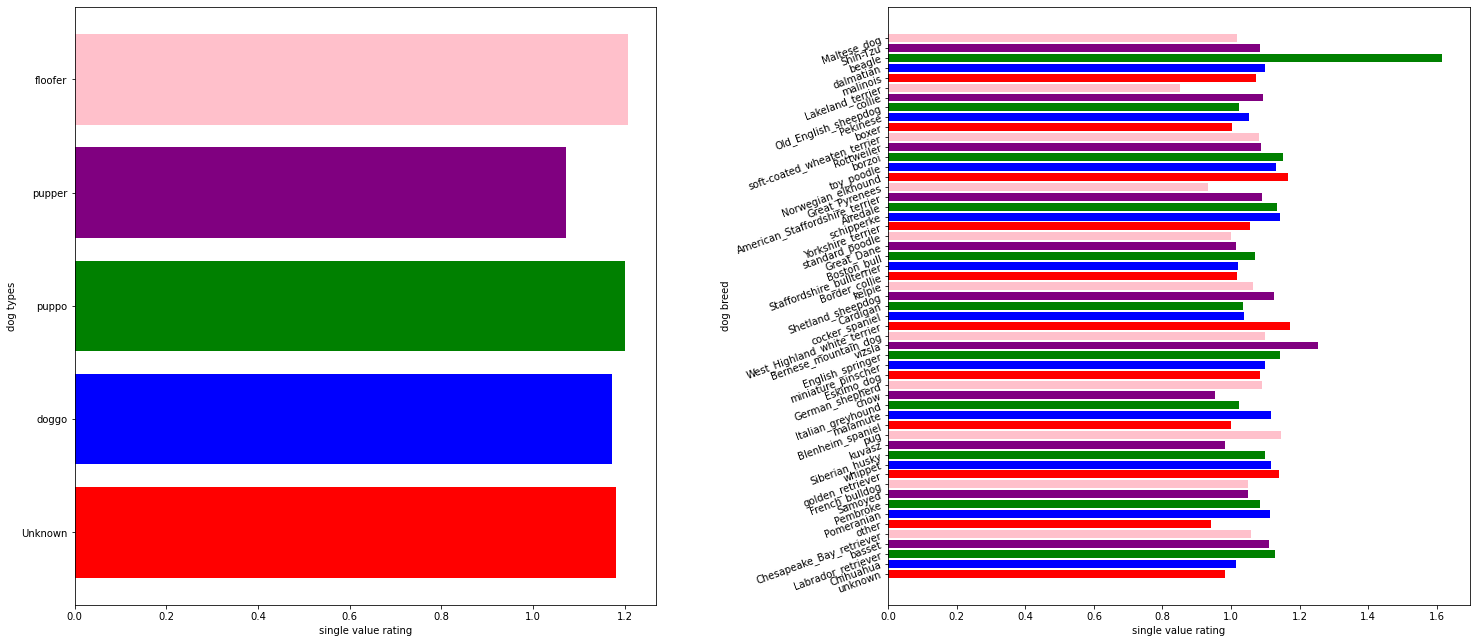

In [319]:
#plotting average single value rating per dog breed and dog type
fig, (ax,bx) = plt.subplots(1,2, figsize = (5,11))

dog_types = tweets.dog_type.unique().tolist()
y_pos = np.arange(5)
rating = tweets.groupby('dog_type').mean().reset_index()

ax.barh(dog_types, rating['rating'], align = 'center', color = ['red', 'blue','green','purple','pink'])
ax.set_yticks(y_pos)
ax.set_xlabel('single value rating')
ax.set_ylabel('dog types')

y_ticks = [i for i in range(len(breed))]
breed = tweets.breed_group.unique().tolist()
y_pos = np.arange(len(breed))
rating2 = tweets.groupby('breed_group').mean()
bx.barh(y_ticks, rating2['rating'], align = 'center', color = ['red', 'blue','green','purple','pink'])
bx.set_yticks(y_pos)
bx.set_yticklabels(breed, rotation = 20)
bx.set_xlabel('single value rating')
bx.set_ylabel('dog breed')
bx.tick_params(axis = 'y', pad = 2)
plt.subplots_adjust(wspace =0.4)
fig.set_figwidth(25)
plt.show()

This analsyiss shows no notable difference in dog types, We do however see one dog breed that stands out. THE NUMBERS ARE NOT CORRECT FOR THE SECOND PLOT. BEAGLE HAS AVERAGE RATING OF 1.2

In [318]:
rating['rating']

breed_group
Airedale                          0.983333
American_Staffordshire_terrier    1.013333
Bernese_mountain_dog              1.127273
Blenheim_spaniel                  1.110000
Border_collie                     1.058333
Boston_bull                       0.941667
Cardigan                          1.114286
Chesapeake_Bay_retriever          1.083871
Chihuahua                         1.049293
English_springer                  1.050000
Eskimo_dog                        1.140909
French_bulldog                    1.116667
German_shepherd                   1.100000
Great_Dane                        0.981818
Great_Pyrenees                    1.146667
Italian_greyhound                 1.000000
Labrador_retriever                1.116346
Lakeland_terrier                  1.023529
Maltese_dog                       0.952632
Norwegian_elkhound                1.090909
Old_English_sheepdog              1.085714
Pekinese                          1.100000
Pembroke                          1.143011

In [296]:
tweets[tweets['breed_group'] == 'unknown'].mean()['rating'],tweets[tweets['breed_group'] == 'beagle'].mean()['rating']

(1.615409836065574, 1.0150000000000001)

In [293]:
tweets.groupby('breed_group').mean().reset_index()

,breed_group,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
0,Airedale,1139.583333,7.184489e+17,9.833333,10.000000,1182.750000,4685.416667,0.983333
1,American_Staffordshire_terrier,814.200000,7.545525e+17,10.133333,10.000000,1746.133333,7499.733333,1.013333
2,Bernese_mountain_dog,817.727273,7.570201e+17,11.272727,10.000000,1368.181818,6501.727273,1.127273
3,Blenheim_spaniel,1012.800000,7.404407e+17,11.100000,10.000000,2185.200000,8248.400000,1.110000
4,Border_collie,870.583333,7.457945e+17,10.583333,10.000000,1885.333333,7982.500000,1.058333
5,Boston_bull,934.750000,7.286202e+17,9.416667,10.000000,1226.333333,4703.250000,0.941667
6,Cardigan,716.952381,7.700266e+17,11.142857,10.000000,3208.238095,11398.476190,1.114286
7,Chesapeake_Bay_retriever,951.967742,7.426868e+17,10.838710,10.000000,2299.967742,8952.258065,1.083871
8,Chihuahua,1130.144444,7.208465e+17,10.500000,10.011111,2466.144444,7741.222222,1.049293
9,English_springer,1220.000000,7.153015e+17,10.500000,10.000000,4631.600000,12640.200000,1.050000


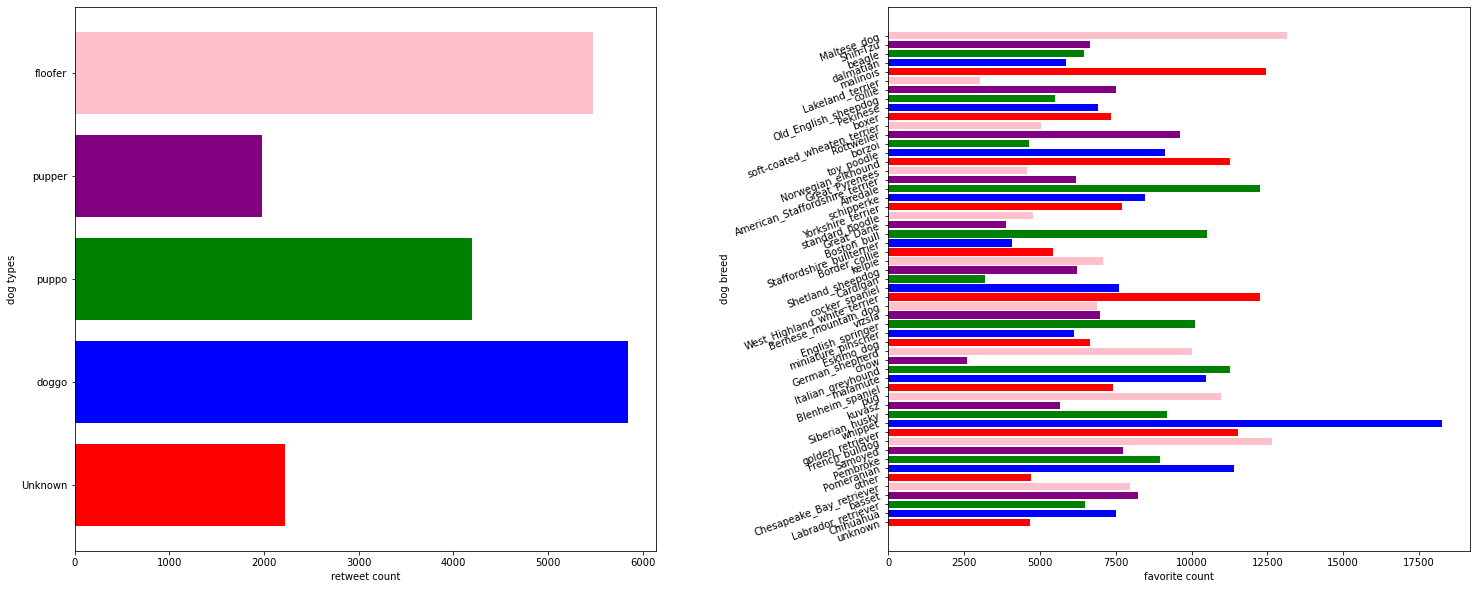

In [279]:
#plotting average retweet count and favorite count per dog breed and dog type
fig, (ax,bx) = plt.subplots(1,2, figsize = (5,10))

dog_types = tweets.dog_type.unique().tolist()
y_pos = np.arange(5)
rating = tweets.groupby('dog_type').mean().reset_index()

ax.barh(dog_types, rating['retweet_count'], align = 'center', color = ['red', 'blue','green','purple','pink'])
ax.set_yticks(y_pos)
ax.set_xlabel('retweet count')
ax.set_ylabel('dog types')

breed = tweets.breed_group.unique().tolist()
y_pos = np.arange(len(breed))
rating = tweets.groupby('breed_group').mean().reset_index()
bx.barh(breed, rating['favorite_count'], align = 'center', color = ['red', 'blue','green','purple','pink'])
bx.set_yticks(y_pos)
bx.set_yticklabels(breed, rotation = 20)
bx.set_xlabel('favorite count')
bx.set_ylabel('dog breed')
plt.subplots_adjust(wspace =0.4)
fig.set_figwidth(25)
plt.show()

In [320]:
tweets[tweets['breed_group']== 'whippet'].favorite_count.mean()

13135.636363636364

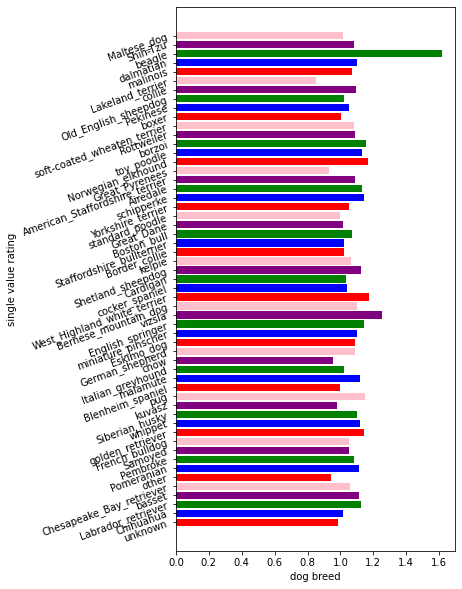

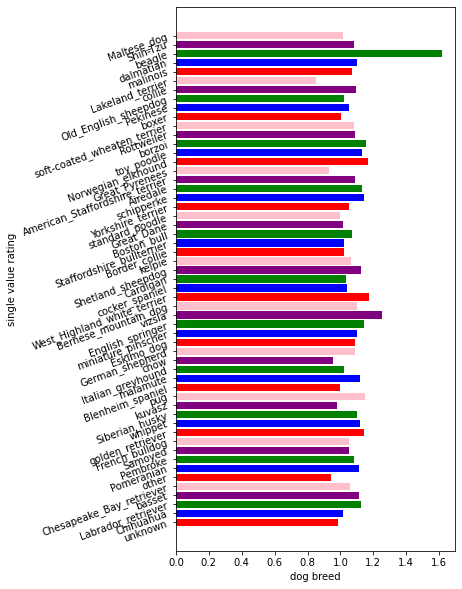

## Statistical Analysis

# Conclusions

Create a 300-600 word written report called `wrangle_report.pdf` or `wrangle_report.html` that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called `act_report.pdf` or `act_report.html` that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.